In [117]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
from astropy.io import fits 
from astropy.table import Table
import corner as corner
from glob import glob
%matplotlib inline

In [2]:
hdu = fits.open('/home/astro/Martin/python_su/data/SMIDGE_BEAST-final_w_obscat_avsnr6_cuts_stats.fits')
header = hdu[0].header
data = hdu[0].data

In [139]:
t = Table.read('/home/astro/Martin/python_su/data/SMIDGE_BEAST-final_w_obscat_avsnr6_cuts_stats.fits')
t[0].colnames

['Name_1',
 'RA',
 'DEC',
 'HST_WFC3_F225W_1',
 'HST_WFC3_F275W_1',
 'HST_WFC3_F336W_1',
 'HST_ACS_WFC_F475W_1',
 'HST_ACS_WFC_F550M_1',
 'HST_ACS_WFC_F658N_1',
 'HST_ACS_WFC_F814W_1',
 'HST_WFC3_F110W_1',
 'HST_WFC3_F160W_1',
 'Av_Best_1',
 'Av_Exp_1',
 'Av_p16_1',
 'Av_p50_1',
 'Av_p84_1',
 'Rv_Best_1',
 'Rv_Exp_1',
 'Rv_p16_1',
 'Rv_p50_1',
 'Rv_p84_1',
 'Rv_A_Best_1',
 'Rv_A_Exp_1',
 'Rv_A_p16_1',
 'Rv_A_p50_1',
 'Rv_A_p84_1',
 'f_A_Best_1',
 'f_A_Exp_1',
 'f_A_p16_1',
 'f_A_p50_1',
 'f_A_p84_1',
 'distance_Best_1',
 'distance_Exp_1',
 'distance_p16_1',
 'distance_p50_1',
 'distance_p84_1',
 'radius_Best_1',
 'radius_Exp_1',
 'radius_p16_1',
 'radius_p50_1',
 'radius_p84_1',
 'logL_Best_1',
 'logL_Exp_1',
 'logL_p16_1',
 'logL_p50_1',
 'logL_p84_1',
 'logg_Best_1',
 'logg_Exp_1',
 'logg_p16_1',
 'logg_p50_1',
 'logg_p84_1',
 'mbolmag_Best_1',
 'mbolmag_Exp_1',
 'mbolmag_p16_1',
 'mbolmag_p50_1',
 'mbolmag_p84_1',
 'logA_Best_1',
 'logA_Exp_1',
 'logA_p16_1',
 'logA_p50_1',
 'logA_p

In [141]:
av = t['Av_p50_1']  # prahova ekstinktsiya in V band
m = t['M_ini_p50_1'] # nachlna masa
age_log = t['logA_p50_1'] # zvezdna vyzrast
temp = t['logT_p50_1'] # zvezdna temperatura
grav = t['logg_p50_1'] # povyrhnostna gravitatsiya
dist = t['distance_p50_1'] # razstoyanie
fa = t['f_A_p50_1'] # SMC/MW dust comparison
rv = t['Rv_p50_1'] #  color excess

F814 = t['F814W_VEGA'] # red filter
F475 = t['F475W_VEGA'] # blue filter

In [24]:
t_smc_hot = t[temp > 4]
print(len(t_smc_hot))

6613


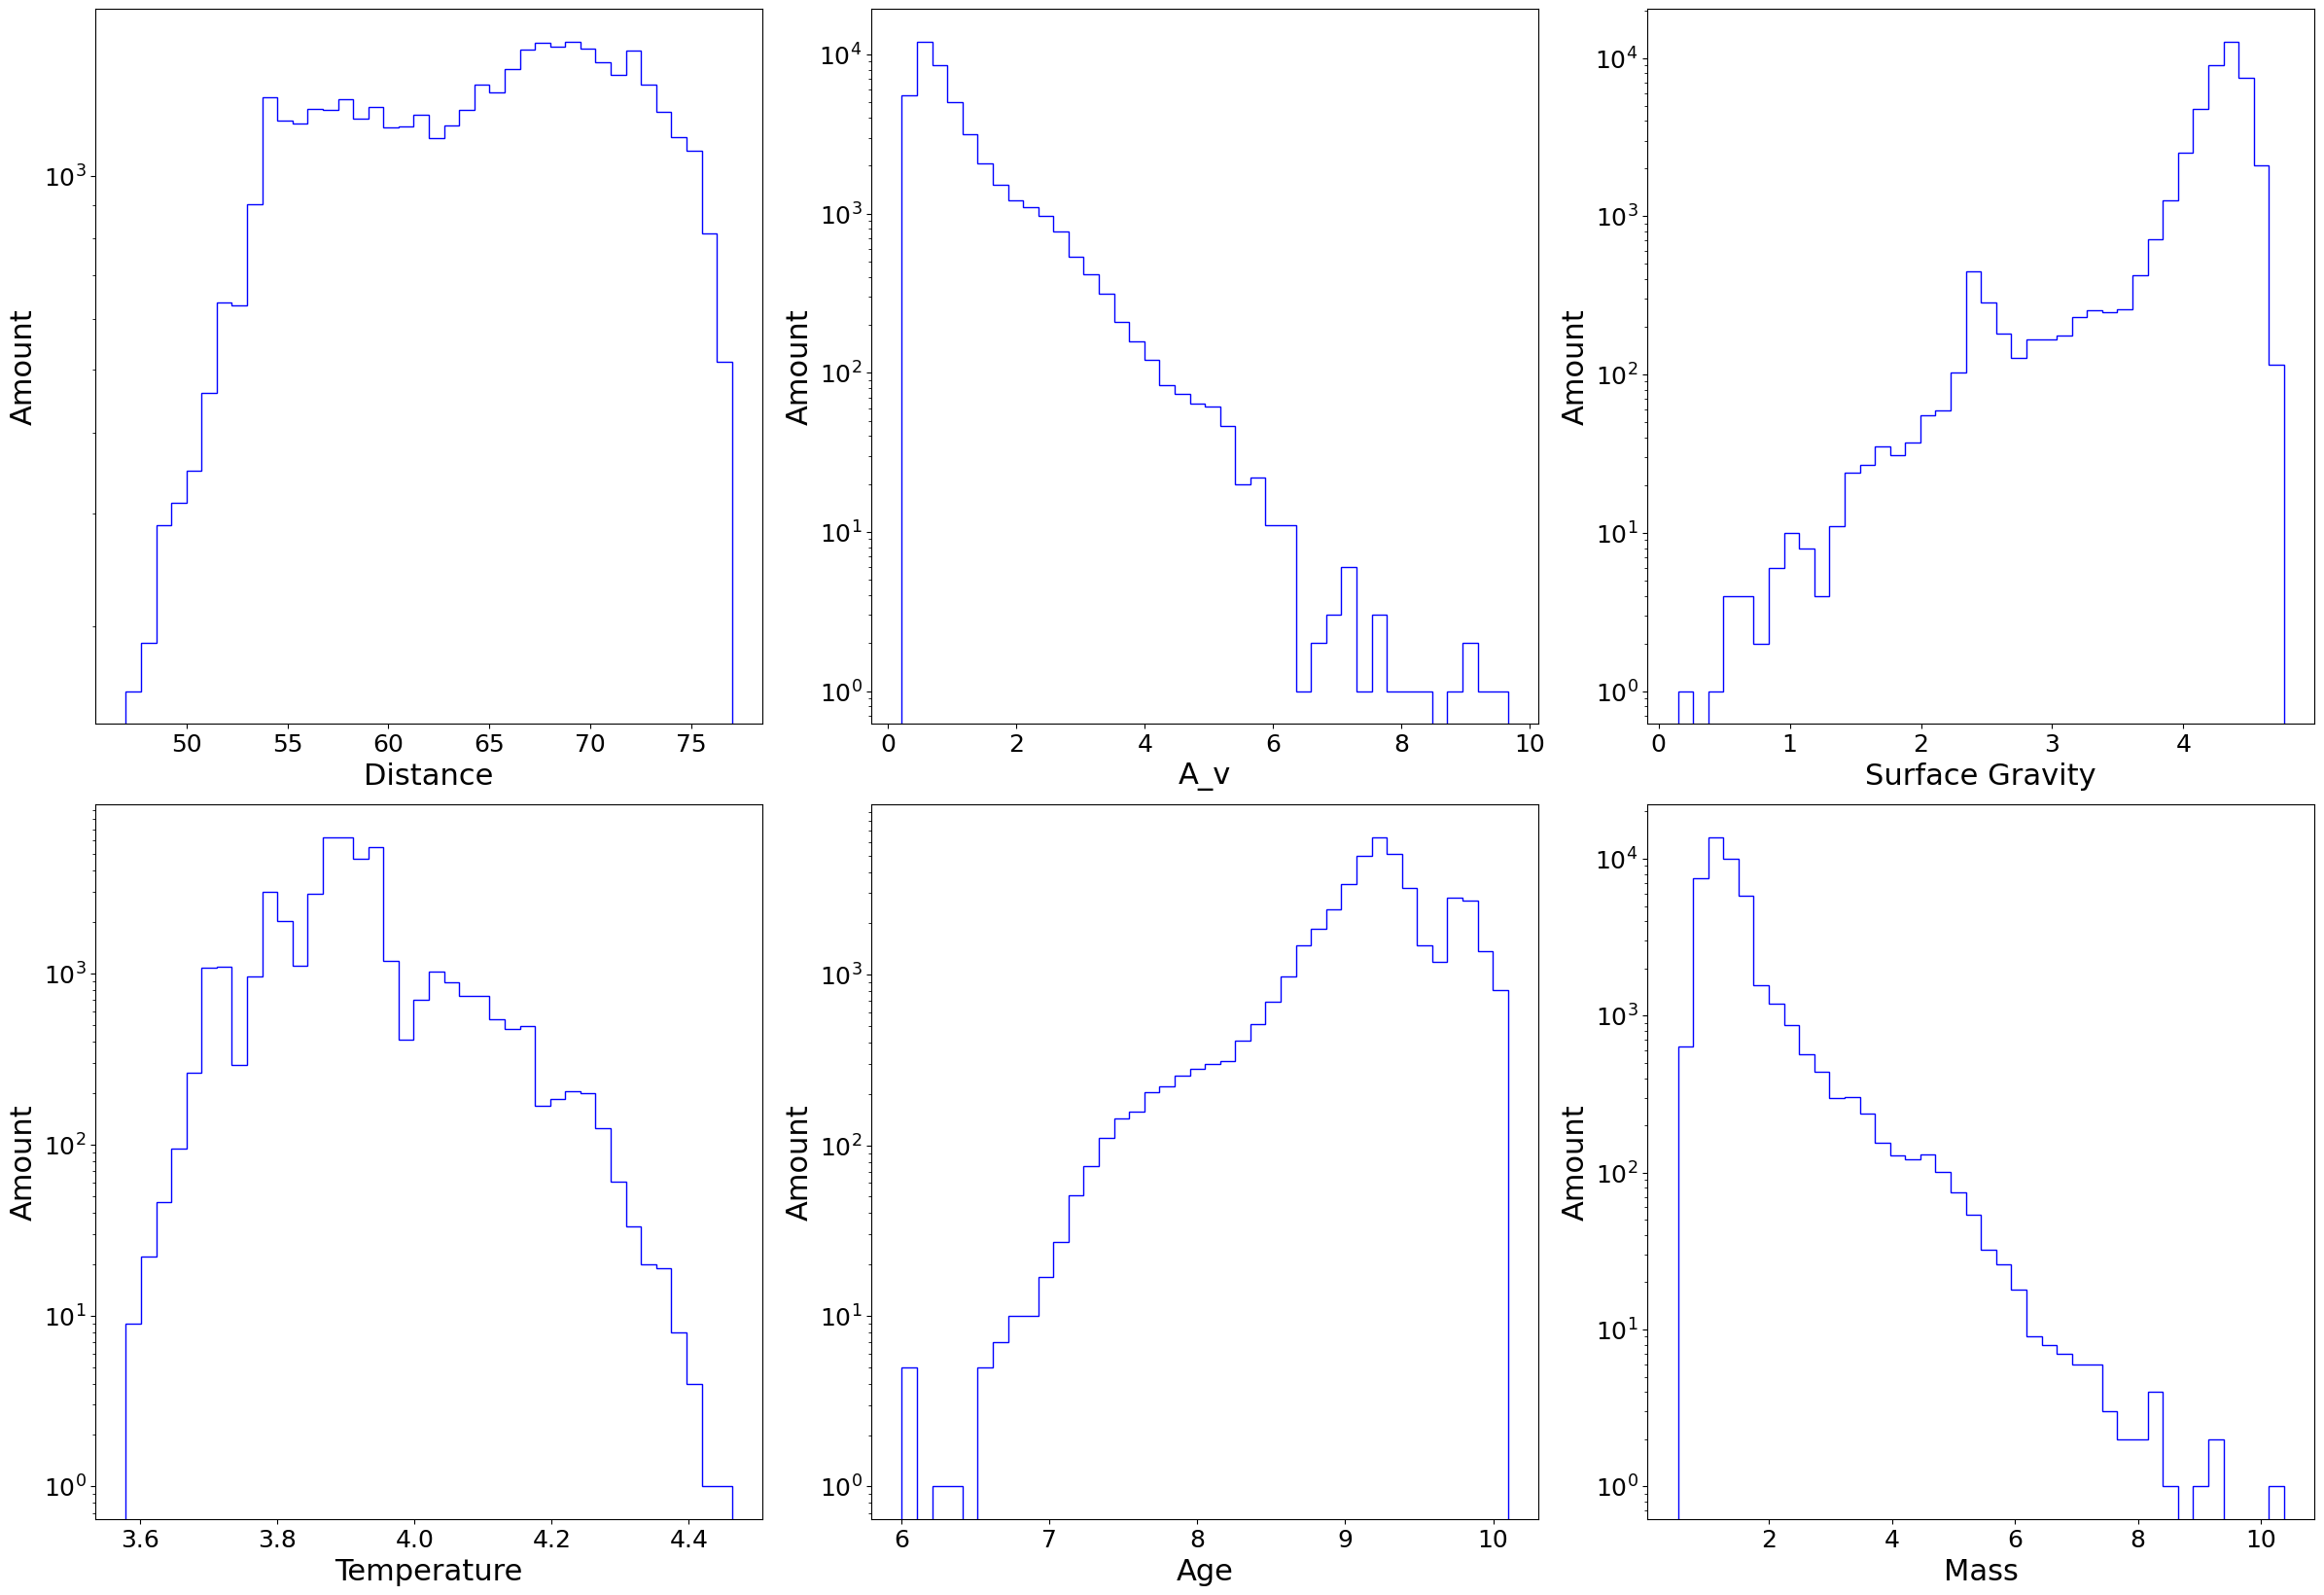

In [114]:
plt.figure(figsize = (24,24))
ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1))
ax3 = plt.subplot2grid((3, 3), (0, 2))
ax4 = plt.subplot2grid((3, 3), (1, 0))
ax5 = plt.subplot2grid((3, 3), (1, 1))
ax6 = plt.subplot2grid((3, 3), (1, 2))


ax1.hist(dist/1000, bins = 40, lw = 1, edgecolor='blue', facecolor = 'none', histtype = 'step')
ax1.set_xlabel('Distance', fontsize = 22)
ax1.set_ylabel('Amount', fontsize = 22)
ax1.set_yscale('log')
ax1.tick_params(labelsize=18)

ax2.hist(av, bins = 40, edgecolor='blue', facecolor = 'none', histtype = 'step')
ax2.set_xlabel('A_v', fontsize = 22)
ax2.set_ylabel('Amount', fontsize = 22)
ax2.set_yscale('log')
ax2.tick_params(labelsize=18)


ax3.hist(grav, bins = 40, edgecolor='blue', facecolor = 'none', histtype = 'step')
ax3.set_xlabel('Surface Gravity', fontsize = 22)
ax3.set_ylabel('Amount', fontsize = 22)
ax3.set_yscale('log')
ax3.tick_params(labelsize=18)


ax4.hist(temp, bins = 40, edgecolor='blue', facecolor = 'none', histtype = 'step')
ax4.set_xlabel('Temperature', fontsize = 22)
ax4.set_ylabel('Amount', fontsize = 22)
ax4.set_yscale('log')
ax4.tick_params(labelsize=18)


ax5.hist(age_log, bins = 40, edgecolor='blue', facecolor = 'none', histtype = 'step')
ax5.set_xlabel('Age', fontsize = 22)
ax5.set_ylabel('Amount', fontsize = 22)
ax5.set_yscale('log')
ax5.tick_params(labelsize=18)


ax6.hist(m, bins = 40, edgecolor='blue', facecolor = 'none', histtype = 'step')
ax6.set_xlabel('Mass', fontsize = 22)
ax6.set_ylabel('Amount', fontsize = 22)
ax6.set_yscale('log')
ax6.tick_params(labelsize=18)

plt.tight_layout()

(29.0, 16.0)

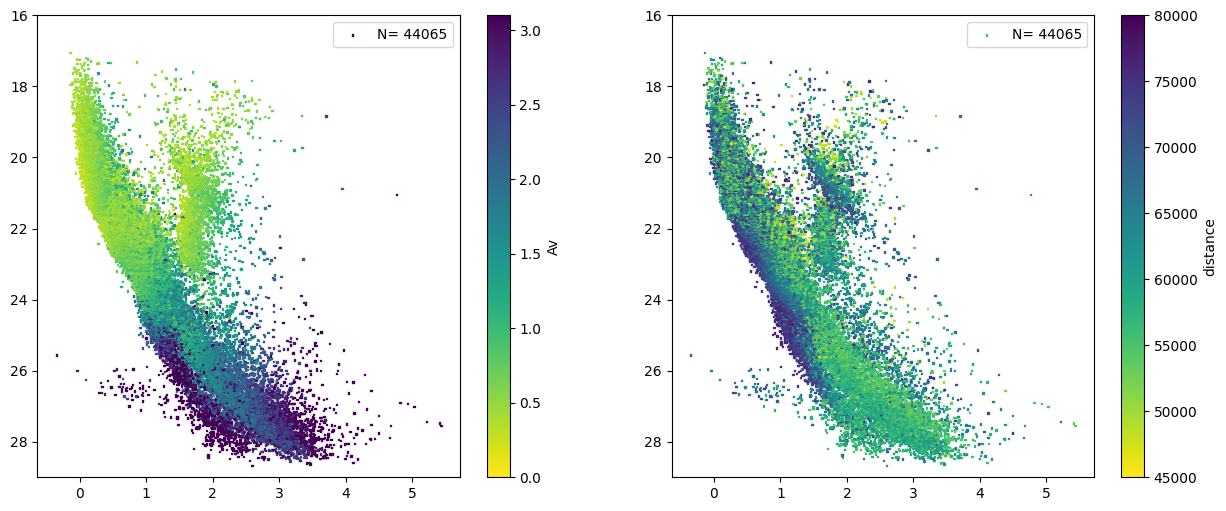

In [77]:
plt.figure(figsize =(15,6))
ax1 = plt.subplot(121)
cb1 = ax1.scatter((F475 - F814), F475, c = av, cmap = 'viridis_r', marker=',', s = 1, label='N= %s' %len(F475), vmin = 0, vmax = 3.1)
plt.colorbar(cb1, label = 'Av')
plt.legend()
plt.ylim(29,16)

ax2 = plt.subplot(122)
cb2 = ax2.scatter((F475 - F814), F475, c = dist, cmap = 'viridis_r', marker=',', s = 1, label='N= %s' %len(F475), vmin = 45000, vmax = 80000)
plt.colorbar(cb2, label = 'distance')
plt.legend()
plt.ylim(29,16)

In [142]:
ndim, nsamples = 4, len(temp)

corr_params = np.stack((rv, fa, av, dist), axis=1)



print(np.shape(corr_params))

(44065, 4)


[[3.28436757e+00 7.61885064e-01 4.29286788e+00 5.51451636e+04]
 [2.63619695e+00 5.36049277e-01 3.91467445e+00 5.52744243e+04]
 [4.90520197e+00 9.67923214e-01 5.47187416e+00 6.12112375e+04]
 ...
 [4.57413463e+00 9.39682121e-01 2.43525735e+00 5.51838240e+04]
 [5.24966687e+00 9.74056335e-01 2.31798045e+00 5.98520057e+04]
 [2.70789385e+00 6.18085089e-01 2.79869276e+00 5.61166056e+04]]
[[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]
 ...
 [ 2.64454574  1.61436808  1.11433854]
 [ 1.61445557  0.85716545  0.84458672]
 [ 4.80682382  4.28364397  0.34261772]]


(50000, 3)

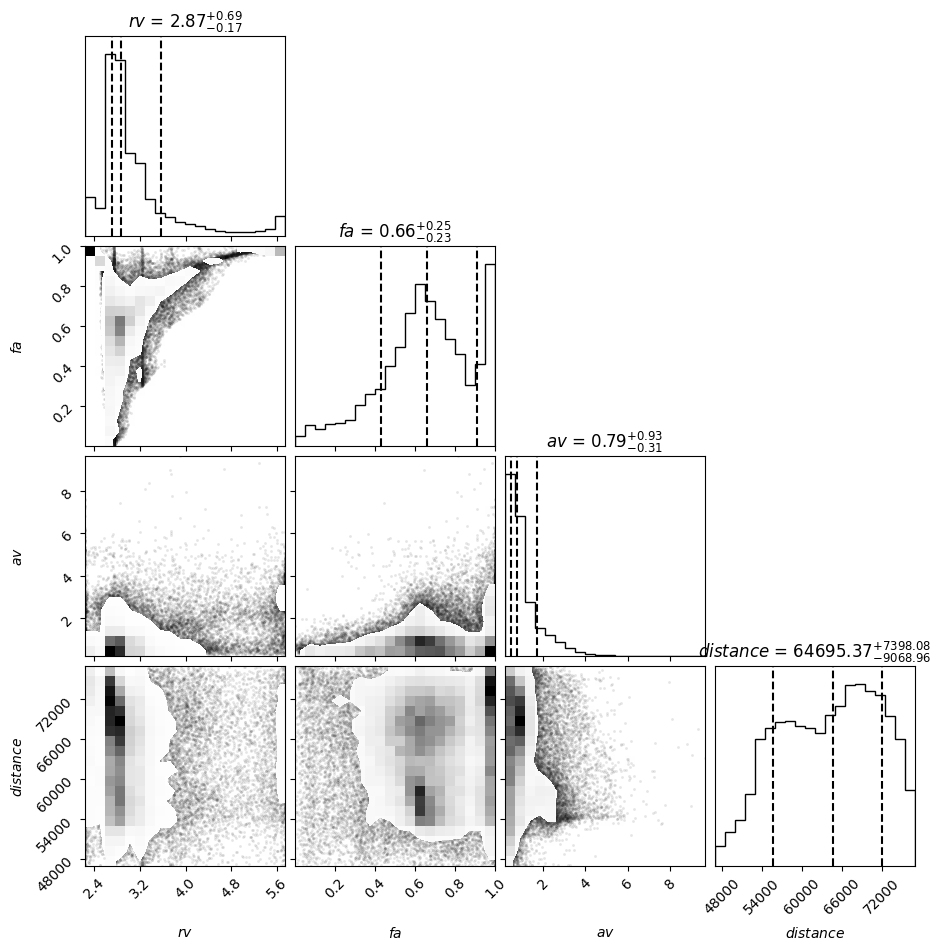

In [146]:
# Set up the parameters of the problem.
ndim, nsamples = 4, len(av)


# Plot it.
figure = corner.corner(
    corr_params,
    labels=[
        r"$rv$",
        r"$fa$",
        r"$av$",
        r"$distance$",
    ],
    quantiles=[0.16, 0.5, 0.84],
    plot_contours=False,
    show_titles=True,
    title_kwargs={"fontsize": 12},
)

print(corr_params)
print(data)
np.shape(data)

[[3.28436757e+00 7.61885064e-01 4.29286788e+00 5.51451636e+04]
 [2.63619695e+00 5.36049277e-01 3.91467445e+00 5.52744243e+04]
 [4.90520197e+00 9.67923214e-01 5.47187416e+00 6.12112375e+04]
 ...
 [4.57413463e+00 9.39682121e-01 2.43525735e+00 5.51838240e+04]
 [5.24966687e+00 9.74056335e-01 2.31798045e+00 5.98520057e+04]
 [2.70789385e+00 6.18085089e-01 2.79869276e+00 5.61166056e+04]]
[[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]
 ...
 [ 2.64454574  1.61436808  1.11433854]
 [ 1.61445557  0.85716545  0.84458672]
 [ 4.80682382  4.28364397  0.34261772]]


(50000, 3)

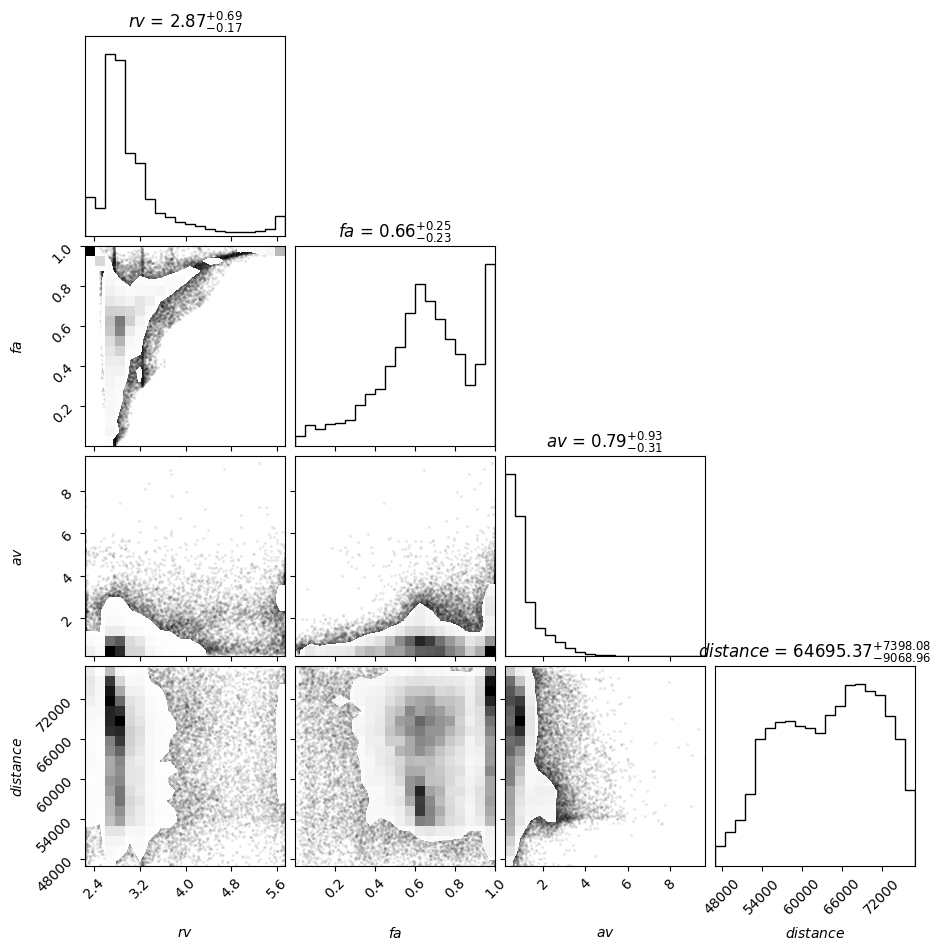

In [147]:
# Set up the parameters of the problem.
ndim, nsamples = 4, len(av)


# Plot it.
figure = corner.corner(
    corr_params,
    labels=[
        r"$rv$",
        r"$fa$",
        r"$av$",
        r"$distance$",
    ],
    plot_contours=False,
    show_titles=True,
    title_kwargs={"fontsize": 12},
)

print(corr_params)
print(data)
np.shape(data)